[DataSet - German Traffic Sign Recognition Benchmark](https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)

 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TariqAlhathloul/GTS_CNN/blob/main/GTS_CNN.ipynb)

In [230]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os
from PIL import Image


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import joblib
from pymongo import MongoClient

In [192]:
image_data = []
labels = []
classes = 43

for i in range(classes):
    path = os.path.join('DataSet/Train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            image_data.append(image)
            labels.append(i)
        except IOError: 
            print(f"Error loading image: {a}")

image_data = np.array(image_data)
labels = np.array(labels)

## split the Data

In [193]:
print(image_data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [194]:
X_train_full, X_test, y_train_full, y_test = train_test_split(image_data, labels, test_size=0.2,shuffle=True, random_state=23)
X_test = X_test / 255.0
X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape

((31367, 30, 30, 3), (7842, 30, 30, 3), (31367,), (7842,))

In [195]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full / 255.0, y_train_full, test_size=0.2, shuffle=True, random_state=23)

In [196]:
X_val.shape, y_val.shape

((6274, 30, 30, 3), (6274,))

In [197]:
# OneHotEncoding for the labels
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

In [198]:
print(f"X_train: {X_train.shape}")
print(f"X_test:  {X_test.shape}")

print(f"y_train: { y_train.shape}")
print(f"y_test:  { y_test.shape}")

X_train: (25093, 30, 30, 3)
X_test:  (7842, 30, 30, 3)
y_train: (25093, 43)
y_test:  (7842, 43)


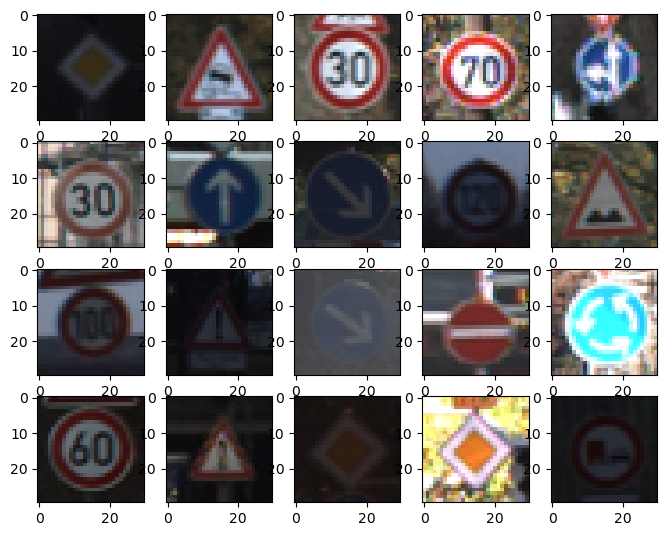

In [199]:
plt.figure(figsize=(8, 8))

for i in range(1,21):
    plt.subplot(5,5, i)
    plt.imshow(X_train[i])

plt.show()

# FIRST MODEL

## EXP1 (CNN, 32, 64, 128, 43)
## Total params: 436,747 (1.67 MB)
num of epoch: 30, 


In [200]:
model = Sequential([
    # the input layer
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:]),
    BatchNormalization(),

    # 1st hidden layer
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    # 2nd hidden layer
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    # the output layer
    Dense(43, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/Users/tariq_assan/miniconda3/envs/pydata-book/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [201]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 436,747 (1.67 MB)

 Trainable params: 436,235 (1.66 MB)

 Non-trainable params: 512 (2.00 KB)

In [202]:
early_stoping = EarlyStopping(
    monitor = 'val_accuracy', 
    patience = 5 )


history = model.fit(X_train, y_train, batch_size=100, 
                    epochs=30, validation_data=(X_val, y_val), 
                    callbacks=[early_stoping],verbose=1)

Epoch 1/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 85ms/step - accuracy: 0.6015 - loss: 1.6329 - val_accuracy: 0.1586 - val_loss: 3.1577
Epoch 2/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.9758 - loss: 0.1172 - val_accuracy: 0.9289 - val_loss: 0.2961
Epoch 3/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9924 - loss: 0.0476 - val_accuracy: 0.9914 - val_loss: 0.0443
Epoch 4/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.9934 - loss: 0.0293 - val_accuracy: 0.9930 - val_loss: 0.0350
Epoch 5/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.9958 - loss: 0.0205 - val_accuracy: 0.9952 - val_loss: 0.0198
Epoch 6/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.9971 - loss: 0.0143 - val_accuracy: 0.9962 - val_loss: 0.0165
Epoch 7/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9967 - loss: 0.0153 - val_accuracy: 0.9963 - val_loss: 0.0143
Epoch 8/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9975 - loss: 0.0112 - 

## data augmentation

In [203]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# fit the generator into the train data

datagen.fit(X_train)

# training the model using the new aubmented data

history1 = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=30,
    callbacks=[early_stoping],
    verbose=1
)

Epoch 1/30
  3/785 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.2448 - loss: 5.7788   

/Users/tariq_assan/miniconda3/envs/pydata-book/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


785/785 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.3794 - loss: 2.5374 - val_accuracy: 0.8215 - val_loss: 0.5768
Epoch 2/30
785/785 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.6303 - loss: 1.1266 - val_accuracy: 0.8341 - val_loss: 0.4733
Epoch 3/30
785/785 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.7306 - loss: 0.8264 - val_accuracy: 0.9272 - val_loss: 0.2601
Epoch 4/30
785/785 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7772 - loss: 0.6740 - val_accuracy: 0.9316 - val_loss: 0.2004
Epoch 5/30
785/785 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8060 - loss: 0.5757 - val_accuracy: 0.9308 - val_loss: 0.2148


In [204]:
# evaluate the model
model.evaluate(X_test, y_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9288 - loss: 0.2106


[0.20195372402668, 0.9343279600143433]

In [232]:
model2 = Sequential([
    # Input layer
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:]),
    BatchNormalization(),

    # 1st hidden layer
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    # 2nd hidden layer
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.35),

    # 3rd hidden layer
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.4),

    # Global Average Pooling before fully connected layers
    GlobalAveragePooling2D(),

    # Fully connected layer
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Output layer
    Dense(43, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/Users/tariq_assan/miniconda3/envs/pydata-book/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [233]:
model2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_56          │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │             

 Total params: 1,226,859 (4.68 MB)

 Trainable params: 1,224,555 (4.67 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [234]:
early_stoping = EarlyStopping(
    monitor = 'val_accuracy', 
    patience = 5 )


history2 = model2.fit(X_train, y_train, batch_size=100, 
                    epochs=30, validation_data=(X_val, y_val), 
                    callbacks=[early_stoping],verbose=1)

Epoch 1/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 101s 393ms/step - accuracy: 0.2647 - loss: 3.1194 - val_accuracy: 0.0534 - val_loss: 4.6602
Epoch 2/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 105s 419ms/step - accuracy: 0.9096 - loss: 0.3093 - val_accuracy: 0.7565 - val_loss: 1.0764
Epoch 3/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 114s 453ms/step - accuracy: 0.9794 - loss: 0.0831 - val_accuracy: 0.9939 - val_loss: 0.0227
Epoch 4/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 117s 467ms/step - accuracy: 0.9885 - loss: 0.0456 - val_accuracy: 0.9909 - val_loss: 0.0341
Epoch 5/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 119s 472ms/step - accuracy: 0.9929 - loss: 0.0292 - val_accuracy: 0.9960 - val_loss: 0.0130
Epoch 6/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 104s 414ms/step - accuracy: 0.9947 - loss: 0.0206 - val_accuracy: 0.9927 - val_loss: 0.0215
Epoch 7/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 106s 423ms/step - accuracy: 0.9959 - loss: 0.0179 - val_accuracy: 0.9971 - val_loss: 0.0106
Epoch 8/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 116s 462ms/step - accuracy: 0.9950 -

In [ ]:

def model_builder(hp):
    # Define specific filter values
    filter_values = hp.Choice([8, 16, 32, 64])
    
    activation_choice = hp.Choice('activation_function', ['relu', 'leaky_relu', 'tanh'])
    
    model = Sequential([
        Conv2D(filter_values, kernel_size=(3, 3), activation=activation_choice, input_shape=(120, 120, 3)),
        MaxPooling2D(2, 2),
        Conv2D(filter_values, kernel_size=(3, 3), activation=activation_choice),
        MaxPooling2D(2, 2),
        Conv2D(filter_values, kernel_size=(3, 3), activation=activation_choice),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(units=43, activation='softmax'),
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

def build_datagen(hp):
    return ImageDataGenerator(
        rotation_range=hp.Int('rotation_range', min_value=0, max_value=90, step=10),
        width_shift_range=hp.Float('width_shift_range', min_value=0.0, max_value=0.3, step=0.05),
        height_shift_range=hp.Float('height_shift_range', min_value=0.0, max_value=0.3, step=0.05),
        zoom_range=hp.Float('zoom_range', min_value=0.0, max_value=0.3, step=0.05),
        horizontal_flip=hp.Boolean('horizontal_flip'),
        rescale=1/255
    )

def train_test_model(hp):
    datagen = build_datagen(hp)
    datagen.fit(X_train)  # Make sure X_train is defined
    model = model_builder(hp)
    model.fit(
        datagen.flow(X_train, y_train, batch_size=64),
        validation_data=datagen.flow(X_val, y_val, batch_size=64),  # Ensure X_val and y_val are defined
        epochs=10, verbose=0
    )
    return model

tuner = kt.RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=3,
    directory='auto_tune_aug'
    # project_name='augmentation_tuning'
)

tuner.search()

In [205]:
y_true = pd.read_csv('DataSet/Test.csv')
image_labels = y_true['ClassId'].values
image_path = y_true['Path'].values

data = []

for img in image_path:
    image = Image.open('./DataSet/' + img)
    image = image.resize((30, 30))
    data.append(np.array(image))


X_test = np.array(data)
y_pred = np.argmax(model.predict(X_test), axis=1)


395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [206]:
print(f"Accuracy: {accuracy_score(image_labels, y_pred)*100:.3f}")

Accuracy: 37.823


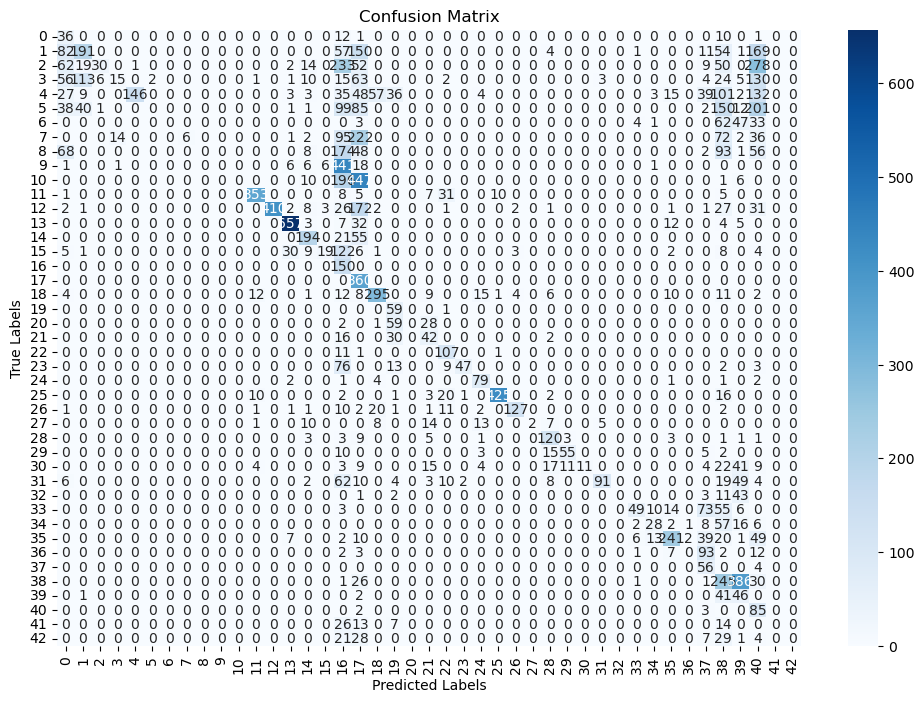

In [207]:
conf_matrix = confusion_matrix(image_labels, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [208]:
print(classification_report(image_labels, y_pred))

              precision    recall  f1-score   support

           0       0.09      0.60      0.16        60
           1       0.51      0.27      0.35       720
           2       0.81      0.04      0.08       750
           3       0.50      0.03      0.06       450
           4       0.99      0.22      0.36       660
           5       0.00      0.00      0.00       630
           6       0.00      0.00      0.00       150
           7       1.00      0.01      0.03       450
           8       0.00      0.00      0.00       450
           9       0.00      0.00      0.00       480
          10       0.00      0.00      0.00       660
          11       0.92      0.84      0.88       420
          12       1.00      0.59      0.75       690
          13       0.92      0.91      0.92       720
          14       0.68      0.72      0.70       270
          15       0.68      0.09      0.16       210
          16       0.08      1.00      0.14       150
          17       0.19    

/Users/tariq_assan/miniconda3/envs/pydata-book/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tariq_assan/miniconda3/envs/pydata-book/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tariq_assan/miniconda3/envs/pydata-book/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [209]:
history_dict = history.history

train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']


epochs = range(1, len(train_loss) + 1)

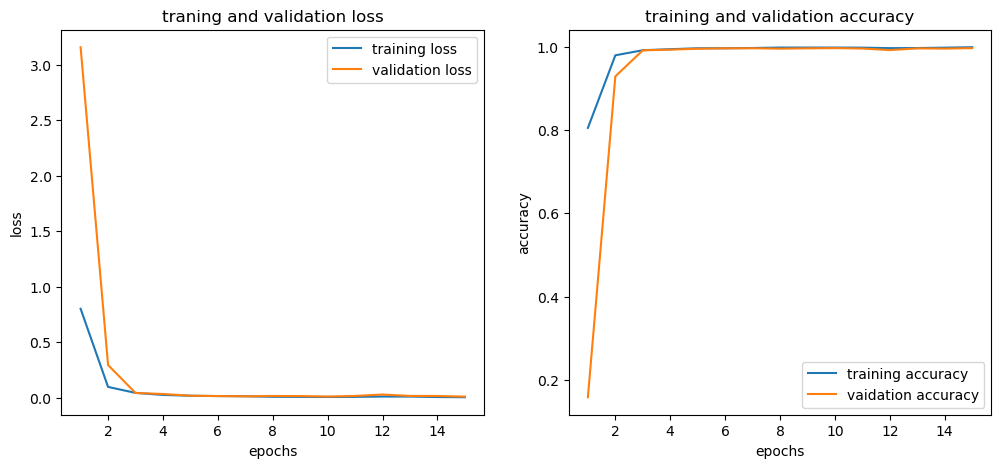

In [210]:
plt.figure(figsize=(12, 5))

# traning and validation loss values
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')

plt.title("traning and validation loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


# training and validation accuracy values
plt.subplot(1, 2, 2)

plt.plot(epochs, train_accuracy, label='training accuracy')
plt.plot(epochs, val_accuracy, label='vaidation accuracy')

plt.title('training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

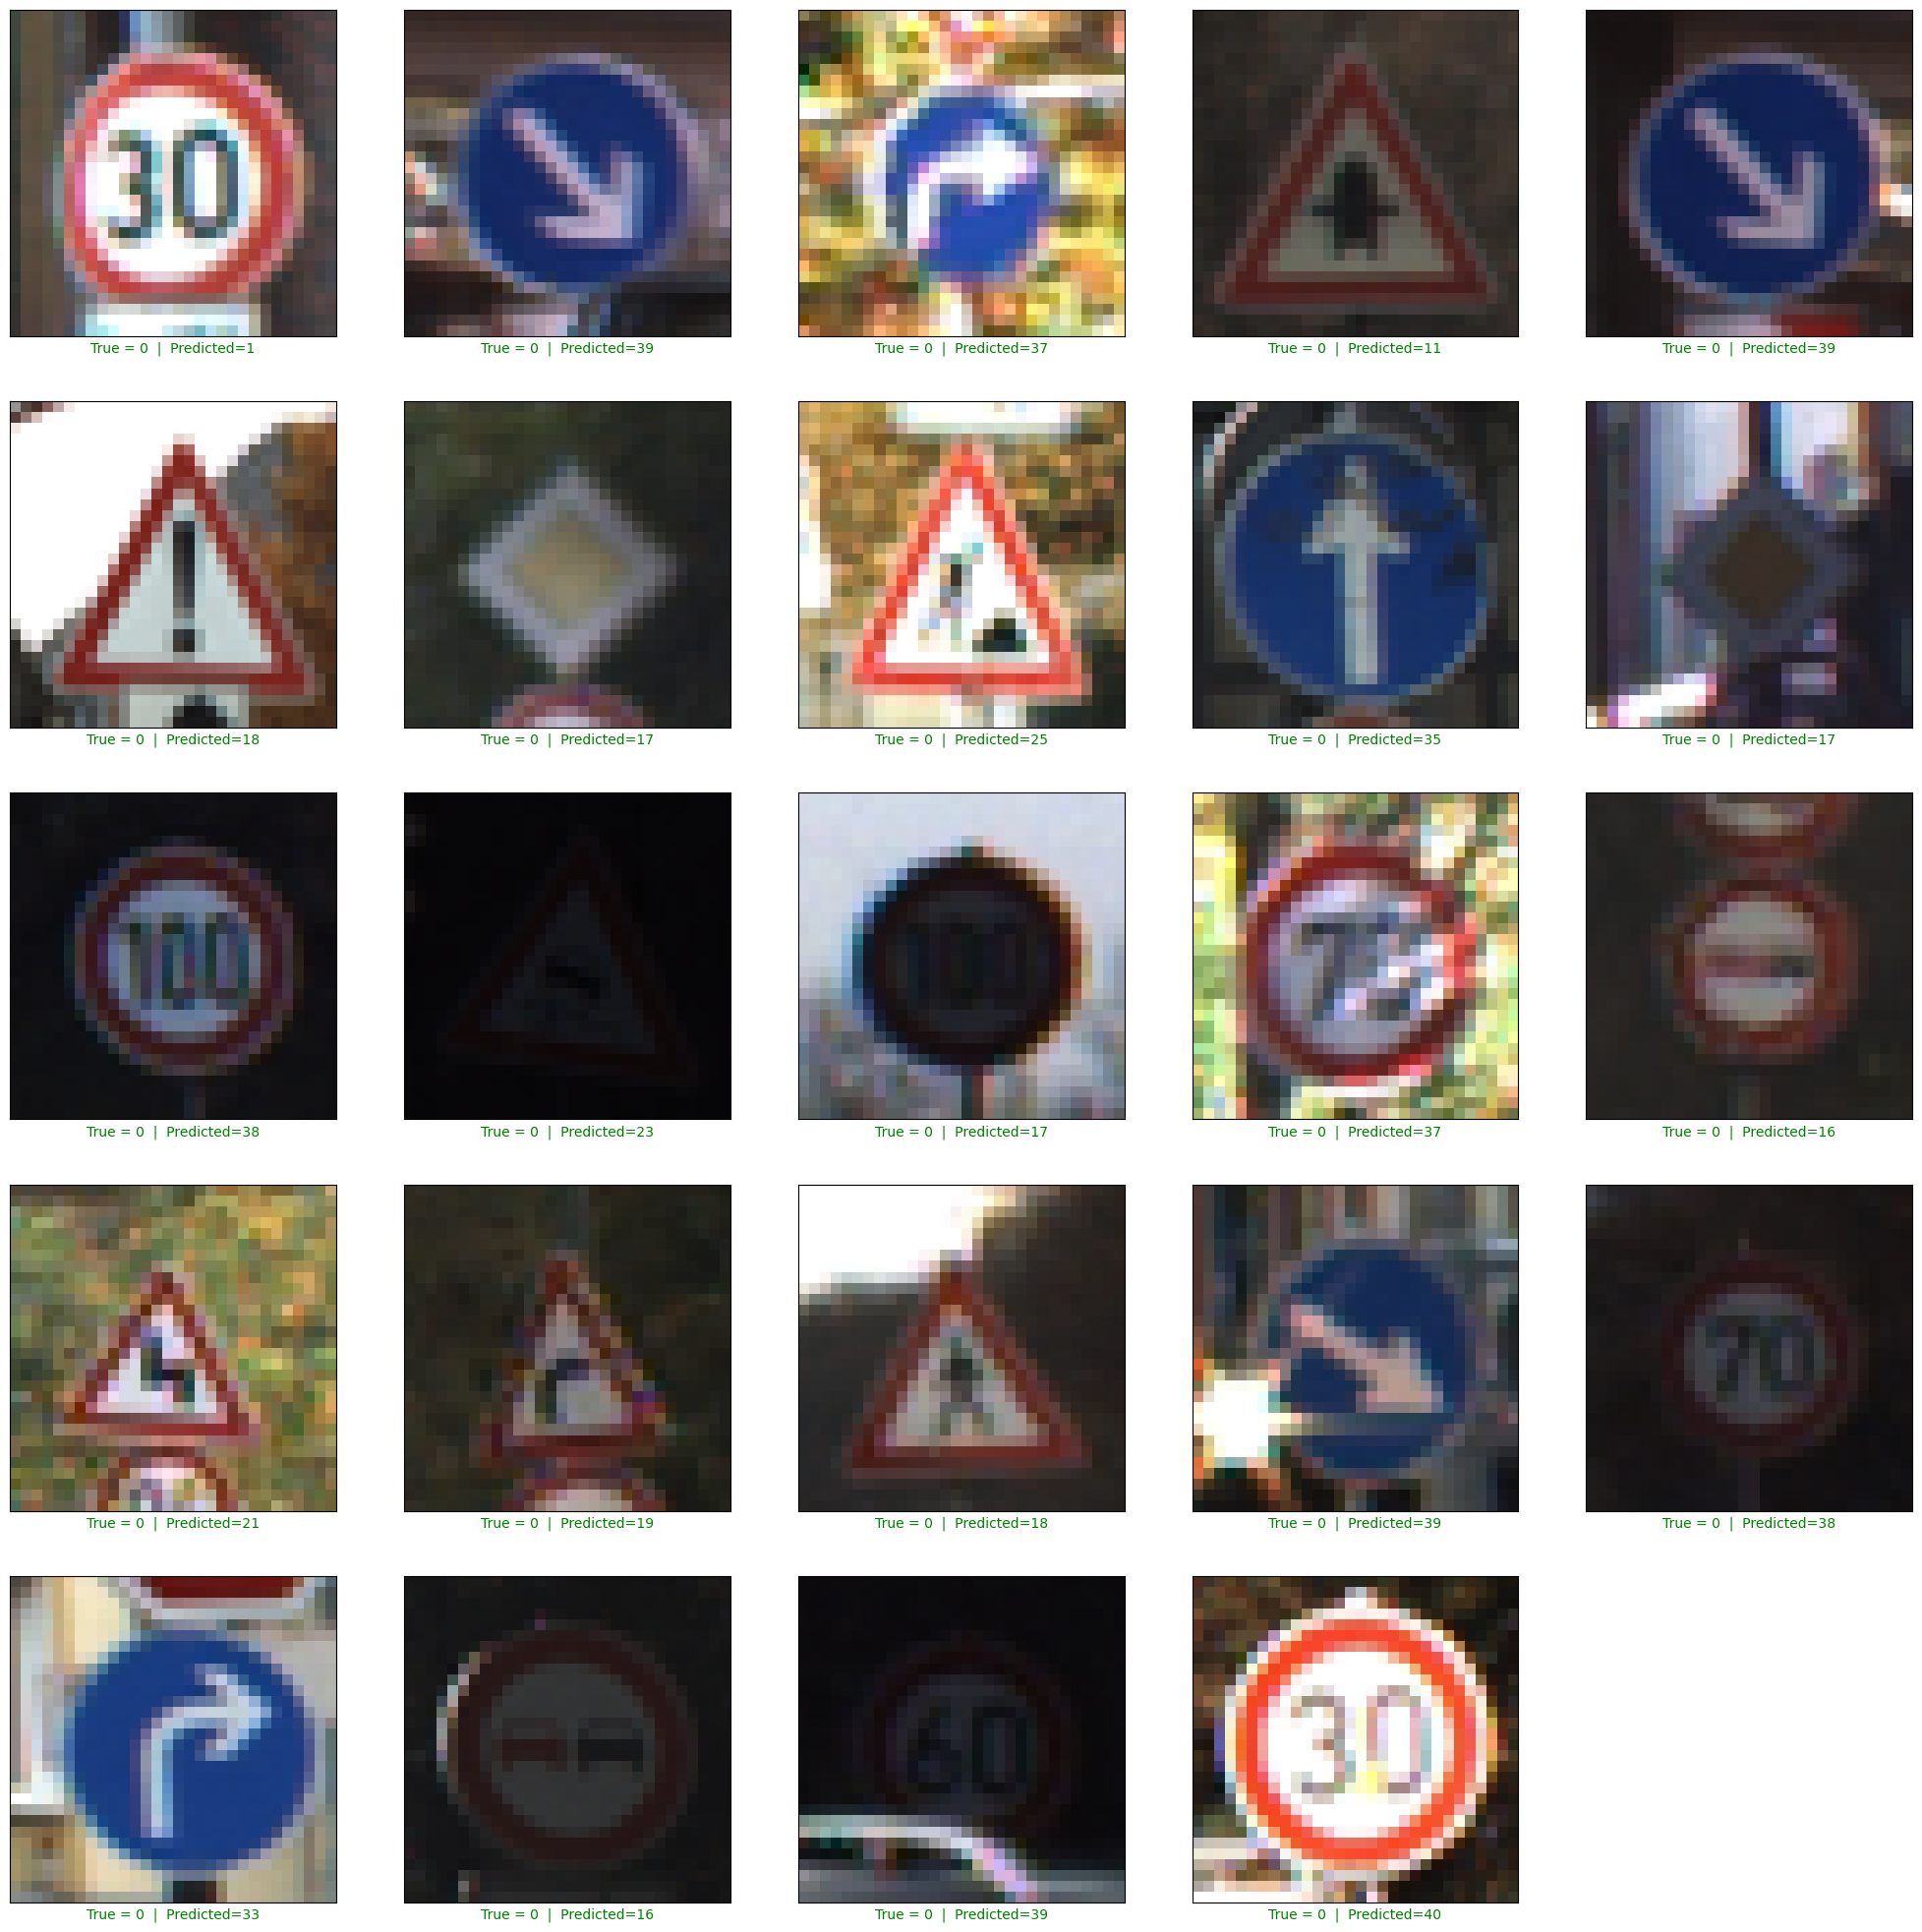

In [211]:
plt.figure(figsize=(25, 25))

index=0
for i in range(1, 25):
    plt.subplot(5,5, i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = y_pred[index + i]
    true = labels[index + i]
    col='g'
    if prediction == true:
        col='red'
    plt.xlabel(f"True = {true}  |  Predicted={prediction}", color=col)
    plt.imshow(X_test[index + i])

plt.show()


## svae the model

In [225]:
model.save('GTS_model.keras')
joblib.dump(model, "GTS_model.pkl")

['GTS_model.pkl']

In [226]:
client = MongoClient(os.getenv('MONGODB_URI'))

db = client['deeplearningCluster']
collection = db['models']

In [227]:
import gridfs

fs = gridfs.GridFS(db)

with open('GTS_model.keras', 'rb') as model_file:
    model_id = fs.put(model_file, filename='GTS_model.keras')

print(f"Model saved with ID: {model_id}")


ServerSelectionTimeoutError: localhost:27017: [Errno 61] Connection refused (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms), Timeout: 30s, Topology Description: <TopologyDescription id: 66bda814b9e4a99292ee2034, topology_type: Unknown, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('localhost:27017: [Errno 61] Connection refused (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms)')>]>